# In motion dataset k-NN

In [3]:
import numpy as np
import scipy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler, LabelEncoder
from PIL import Image
import time

In [4]:
def create_array(df):
    scaled = True
    arr = np.array(df["Signal"])
    arr_numpy = []
    for i in range(len(arr)):
        arr[i] = arr[i].replace("[","")
        arr[i] = arr[i].replace("\n","")
        arr[i] = arr[i].replace("]","")
        float_list = []
        for item in arr[i].split():  
            float_list.append(float(item))
        arr_numpy.append(float_list)
        
    arr_numpy = np.array(arr_numpy)
    if scaled:
        scaler = StandardScaler()
        arr_numpy = scaler.fit_transform(arr_numpy.T).T
    return arr_numpy , np.array(df["Label"])

# ECG

In [5]:
accuracy = np.load('accuracy_ecg_WALK.npy')
accuracy_PCA = np.load('accuracy_ecg_PCA_WALK.npy')
accuracy_no = np.load('accuracy_ecg_NO_WALK.npy')
accuracy_PCA_no = np.load('accuracy_ecg_PCA_NO_WALK.npy')

In [6]:
ecg = pd.read_csv("../DATA_CSV/ECG_filtered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ecg_df, test_ecg_df = train_test_split(ecg, test_size=0.2, stratify=ecg['Label'], random_state=123)

num_train_ecg_Simo   = sum(train_ecg_df['Label'] == 0)
num_train_ecg_Luci   = sum(train_ecg_df['Label'] == 1)
num_train_ecg_Linda  = sum(train_ecg_df['Label'] == 2)
num_train_ecg_Marghe = sum(train_ecg_df['Label'] == 3)

num_test_ecg_Luci   = sum(test_ecg_df['Label'] == 1)
num_test_ecg_Simo   = sum(test_ecg_df['Label'] == 0)
num_test_ecg_Linda  = sum(test_ecg_df['Label'] == 2)
num_test_ecg_Marghe = sum(test_ecg_df['Label'] == 3)

print('TRAIN SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_train_ecg_Simo, 100 * num_train_ecg_Simo / len(train_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_train_ecg_Linda, 100 * num_train_ecg_Linda / len(train_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_train_ecg_Marghe, 100 * num_train_ecg_Marghe / len(train_ecg_df)))

print('VALIDATION SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_test_ecg_Simo, 100 * num_test_ecg_Simo / len(test_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_test_ecg_Luci, 100 * num_test_ecg_Luci / len(test_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_test_ecg_Linda, 100 * num_test_ecg_Linda / len(test_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_test_ecg_Marghe, 100 * num_test_ecg_Marghe / len(test_ecg_df)))


TRAIN SET ECG
	Simo ECG: 2324 (21.90%)
	Luci ECG: 2557 (24.10%)
	Linda ECG: 1887 (17.78%)
	Marghe ECG: 3844 (36.22%)
VALIDATION SET ECG
	Simo ECG: 581 (21.89%)
	Luci ECG: 639 (24.08%)
	Linda ECG: 472 (17.78%)
	Marghe ECG: 962 (36.25%)


In [7]:
ecg_mat_train, label_ecg_train = create_array(train_ecg_df) 
ecg_mat_test, label_ecg_test  = create_array(test_ecg_df) 

In [5]:
accuracy = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train) 
    Pred_y = neigh.predict(ecg_mat_test) 
    accuracy.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [8]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy)+1, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy))

Execution time =  0.002991971969604492
Highest accuracy =  0.979276563677468


### Clustering after PCA

In [9]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ecg_mat_train)
Y_hat_train = pca2.transform(ecg_mat_train)
Y_hat_test = pca2.transform(ecg_mat_test)

In [49]:
accuracy_PCA = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [10]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA))

Execution time =  0.0014498424530029297
Highest accuracy =  0.9826676714393369


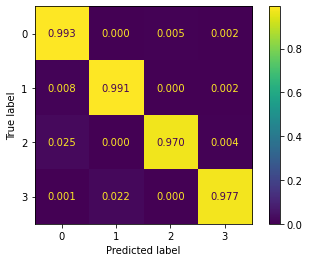

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh, Y_hat_test, label_ecg_test, normalize = 'true', values_format = '.3f', display_labels =['A rest','B rest','A moving','B moving'])
plt.savefig('img/confusion_matrix_ecg_walk.pdf')
plt.show()

### Non filtered

In [11]:
ecg = pd.read_csv("../DATA_CSV/ECG_nofiltered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ecg_df, test_ecg_df = train_test_split(ecg, test_size=0.2, stratify=ecg['Label'], random_state=123)

num_train_ecg_Simo   = sum(train_ecg_df['Label'] == 0)
num_train_ecg_Luci   = sum(train_ecg_df['Label'] == 1)
num_train_ecg_Linda  = sum(train_ecg_df['Label'] == 2)
num_train_ecg_Marghe = sum(train_ecg_df['Label'] == 3)

num_test_ecg_Luci   = sum(test_ecg_df['Label'] == 1)
num_test_ecg_Simo   = sum(test_ecg_df['Label'] == 0)
num_test_ecg_Linda  = sum(test_ecg_df['Label'] == 2)
num_test_ecg_Marghe = sum(test_ecg_df['Label'] == 3)

print('TRAIN SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_train_ecg_Simo, 100 * num_train_ecg_Simo / len(train_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_train_ecg_Linda, 100 * num_train_ecg_Linda / len(train_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_train_ecg_Marghe, 100 * num_train_ecg_Marghe / len(train_ecg_df)))

print('VALIDATION SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_test_ecg_Simo, 100 * num_test_ecg_Simo / len(test_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_test_ecg_Luci, 100 * num_test_ecg_Luci / len(test_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_test_ecg_Linda, 100 * num_test_ecg_Linda / len(test_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_test_ecg_Marghe, 100 * num_test_ecg_Marghe / len(test_ecg_df)))


TRAIN SET ECG
	Simo ECG: 2324 (21.90%)
	Luci ECG: 2557 (24.10%)
	Linda ECG: 1887 (17.78%)
	Marghe ECG: 3844 (36.22%)
VALIDATION SET ECG
	Simo ECG: 581 (21.89%)
	Luci ECG: 639 (24.08%)
	Linda ECG: 472 (17.78%)
	Marghe ECG: 962 (36.25%)


In [12]:
ecg_mat_train, label_ecg_train = create_array(train_ecg_df) 
ecg_mat_test, label_ecg_test  = create_array(test_ecg_df) 

In [16]:
accuracy_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train) 
    Pred_y = neigh.predict(ecg_mat_test) 
    accuracy_no.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [13]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_no)+1, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_no))

Execution time =  0.0029272031784057617
Highest accuracy =  0.9815373021853806


### Clustering after PCA 

In [14]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ecg_mat_train)
Y_hat_train = pca2.transform(ecg_mat_train)
Y_hat_test = pca2.transform(ecg_mat_test)

In [19]:
accuracy_PCA_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA_no.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [15]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA_no)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA_no))

Execution time =  0.0014243054389953614
Highest accuracy =  0.9826676714393369


In [1]:
# plt.figure(figsize=(16, 10))
# plt.plot(accuracy, 'darkblue')
# plt.plot(accuracy_PCA, 'darkblue', linestyle='dashed')
# plt.plot(accuracy_no, 'darkred')
# plt.plot(accuracy_PCA_no, 'darkred', linestyle='dashed')
# plt.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"],prop={"size":21})
# plt.xlabel("Number of Neighbors",size=21)
# plt.ylabel("Accuracy",size=21)
# #plt.title("Accuracy of KNN for original ECG signal and for 95% variance PCA filtered and non filtered")
# plt.xticks(fontsize=18) 
# plt.yticks(fontsize=18) 
# plt.grid()
# plt.savefig('img/knn_pca_ecg_WALK.pdf')
# plt.show()

## PPG

In [16]:
accuracy_pp = np.load('accuracy_ppg_WALK.npy')
accuracy_PCA_pp = np.load('accuracy_ppg_PCA_WALK.npy')
accuracy_no_pp = np.load('accuracy_ppg_NO_WALK.npy')
accuracy_PCA_no_pp = np.load('accuracy_ppg_PCA_NO_WALK.npy')

In [17]:
ppg = pd.read_csv("../DATA_CSV/PPG_filtered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ppg_df, test_ppg_df = train_test_split(ppg, test_size=0.2, stratify=ppg['Label'], random_state=123)

num_train_ppg_Simo   = sum(train_ppg_df['Label'] == 0)
num_train_ppg_Luci   = sum(train_ppg_df['Label'] == 1)
num_train_ppg_Linda  = sum(train_ppg_df['Label'] == 2)
num_train_ppg_Marghe = sum(train_ppg_df['Label'] == 3)

num_test_ppg_Luci   = sum(test_ppg_df['Label'] == 1)
num_test_ppg_Simo   = sum(test_ppg_df['Label'] == 0)
num_test_ppg_Linda  = sum(test_ppg_df['Label'] == 2)
num_test_ppg_Marghe = sum(test_ppg_df['Label'] == 3)

print('TRAIN SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_train_ppg_Simo, 100 * num_train_ppg_Simo / len(train_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_train_ppg_Luci, 100 * num_train_ppg_Luci / len(train_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_train_ppg_Linda, 100 * num_train_ppg_Linda / len(train_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_train_ppg_Marghe, 100 * num_train_ppg_Marghe / len(train_ppg_df)))

print('TEST SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_test_ppg_Simo, 100 * num_test_ppg_Simo / len(test_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_test_ppg_Luci, 100 * num_test_ppg_Luci / len(test_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_test_ppg_Linda, 100 * num_test_ppg_Linda / len(test_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_test_ppg_Marghe, 100 * num_test_ppg_Marghe / len(test_ppg_df)))

TRAIN SET PPG
	Simo ppg: 2305 (23.98%)
	Luci ppg: 2546 (26.48%)
	Linda ppg: 1046 (10.88%)
	Marghe ppg: 3716 (38.66%)
TEST SET PPG
	Simo ppg: 576 (23.96%)
	Luci ppg: 637 (26.50%)
	Linda ppg: 262 (10.90%)
	Marghe ppg: 929 (38.64%)


In [18]:
ppg_mat_train, label_ppg_train = create_array(train_ppg_df) 
ppg_mat_test, label_ppg_test   = create_array(test_ppg_df) 

In [24]:
accuracy = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    Pred_y = neigh.predict(ppg_mat_test) 
    accuracy.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [19]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy)+1, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy))

Execution time =  0.002910175323486328
Highest accuracy =  0.979276563677468


### PCA

In [20]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ppg_mat_train)
Y_hat_train = pca2.transform(ppg_mat_train)
Y_hat_test = pca2.transform(ppg_mat_test)

In [27]:
accuracy_PCA = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [21]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA))

Execution time =  0.0013169240951538086
Highest accuracy =  0.9826676714393369


### Non filtered

In [22]:
ppg = pd.read_csv("../DATA_CSV/PPG_nofiltered_noscaled_cammina.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ppg_df, test_ppg_df = train_test_split(ppg, test_size=0.2, stratify=ppg['Label'], random_state=123)

num_train_ppg_Simo   = sum(train_ppg_df['Label'] == 0)
num_train_ppg_Luci   = sum(train_ppg_df['Label'] == 1)
num_train_ppg_Linda  = sum(train_ppg_df['Label'] == 2)
num_train_ppg_Marghe = sum(train_ppg_df['Label'] == 3)

num_test_ppg_Luci   = sum(test_ppg_df['Label'] == 1)
num_test_ppg_Simo   = sum(test_ppg_df['Label'] == 0)
num_test_ppg_Linda  = sum(test_ppg_df['Label'] == 2)
num_test_ppg_Marghe = sum(test_ppg_df['Label'] == 3)

print('TRAIN SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_train_ppg_Simo, 100 * num_train_ppg_Simo / len(train_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_train_ppg_Luci, 100 * num_train_ppg_Luci / len(train_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_train_ppg_Linda, 100 * num_train_ppg_Linda / len(train_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_train_ppg_Marghe, 100 * num_train_ppg_Marghe / len(train_ppg_df)))

print('TEST SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_test_ppg_Simo, 100 * num_test_ppg_Simo / len(test_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_test_ppg_Luci, 100 * num_test_ppg_Luci / len(test_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_test_ppg_Linda, 100 * num_test_ppg_Linda / len(test_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_test_ppg_Marghe, 100 * num_test_ppg_Marghe / len(test_ppg_df)))

TRAIN SET PPG
	Simo ppg: 2290 (23.73%)
	Luci ppg: 2656 (27.52%)
	Linda ppg: 985 (10.21%)
	Marghe ppg: 3719 (38.54%)
TEST SET PPG
	Simo ppg: 573 (23.75%)
	Luci ppg: 664 (27.52%)
	Linda ppg: 246 (10.19%)
	Marghe ppg: 930 (38.54%)


In [23]:
ppg_mat_train, label_ppg_train = create_array(train_ppg_df) 
ppg_mat_test, label_ppg_test   = create_array(test_ppg_df) 

In [58]:
accuracy_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    Pred_y = neigh.predict(ppg_mat_test) 
    accuracy_no.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [24]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_no)+1, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_no))

Execution time =  0.0031574106216430663
Highest accuracy =  0.9815373021853806


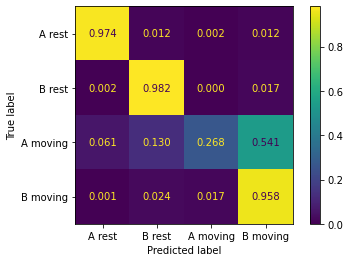

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neigh, ppg_mat_test, label_ppg_test, normalize = 'true', values_format = '.3f', display_labels =['A rest','B rest','A moving','B moving'])
plt.savefig('img/confusion_matrix_ppg_walk.pdf')
plt.show()

### PCA

In [25]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ppg_mat_train)
Y_hat_train = pca2.transform(ppg_mat_train)
Y_hat_test = pca2.transform(ppg_mat_test)

In [34]:
accuracy_PCA_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA_no.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [26]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA_no)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA_no))

Execution time =  0.0014007186889648437
Highest accuracy =  0.9826676714393369


In [2]:
# plt.figure(figsize=(16, 10))
# plt.plot(accuracy, 'darkblue')
# plt.plot(accuracy_PCA, 'darkblue', linestyle='dashed')
# plt.plot(accuracy_no, 'darkred')
# plt.plot(accuracy_PCA_no, 'darkred', linestyle='dashed')
# plt.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"],prop={"size":21})
# plt.xlabel("Number of Neighbors",size=21)
# plt.ylabel("Accuracy",size=21)
# #plt.title("Accuracy of KNN for original PPG signal and for 95% variance PCA filtered and non filtered")
# plt.xticks(fontsize=18) 
# plt.yticks(fontsize=18) 
# plt.grid()
# plt.savefig('img/knn_pca_ppg_WALK.pdf')
# plt.show()

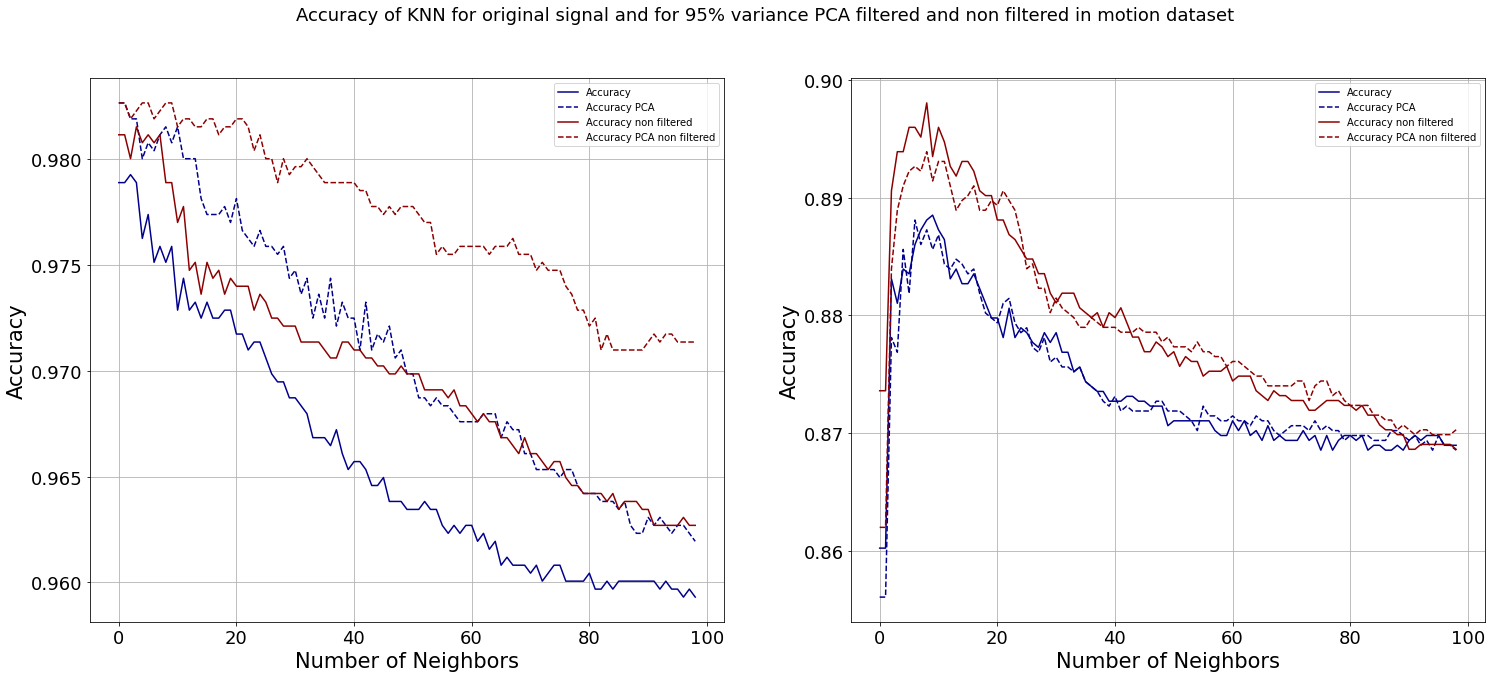

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,10)) 
fig.suptitle("Accuracy of KNN for original signal and for 95% variance PCA filtered and non filtered in motion dataset",fontsize=18) 
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()): 
    item.set_fontsize(18) 
ax1.plot(accuracy, 'darkblue')
ax1.plot(accuracy_PCA, 'darkblue', linestyle='dashed')
ax1.plot(accuracy_no, 'darkred')
ax1.plot(accuracy_PCA_no, 'darkred', linestyle='dashed')
ax1.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"])
ax1.set_xlabel("Number of Neighbors")
ax1.set_ylabel("Accuracy")
#ax1.legend(fontsize=18) 
ax1.grid() 

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()): 
    item.set_fontsize(18) 
ax2.plot(accuracy_pp, 'darkblue')
ax2.plot(accuracy_PCA_pp, 'darkblue', linestyle='dashed')
ax2.plot(accuracy_no_pp, 'darkred')
ax2.plot(accuracy_PCA_no_pp, 'darkred', linestyle='dashed')
ax2.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"])
ax2.set_xlabel("Number of Neighbors")
ax2.set_ylabel("Accuracy")
#ax2.legend(fontsize=18) 
ax2.grid() 

plt.savefig("./img/knn_WALK.pdf")